In [19]:
import numpy as np
import pandas as pd
import polars as pl
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
from investment_estimations import (
    calculate_return_on_investment, 
    calculate_accumulated_return,
    build_dataframe,
    MONTHS_IN_YEAR,
    DEFAULT_RETIREMENT_YEARS,
    define_scenario
)

In [20]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

### Calculation of composed return. Composed return function

In [21]:
# Calculation of composed return. Composed return function
principal_amount = 1e+4
yearly_contribution = 100 * 12
roi = 0.06
years = 30
yield_times_per_y = 12

periodic_contribution = yearly_contribution / yield_times_per_y

print(calculate_accumulated_return(principal_amount,
                                   yearly_contribution,
                                   roi,
                                   years,
                                   yield_times_per_y, True))

(160677.26, 6.02)


### Estimation of composed return. Simulation

Scenario

In [22]:
# Define initial parameters
initial_principal = 1e+4
annual_contribution = 200 * 12
annual_roi = 0.06
investment_duration = 60
retirement_duration = 30
retirement_income = 1500
retirement_contribution = 0.5 * annual_contribution
compounding_frequency = 1  # Compounding once per year

# Define the minimum investment amount
minimum_investment_amount = 1e1

# Calculate the total balance and earnings using the updated function
total_balance, earnings = calculate_return_on_investment(
    principal=initial_principal,
    annual_roi=annual_roi,
    compounding_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    investment_duration=investment_duration,
    min_investment_amount=minimum_investment_amount,
    retirement_duration=retirement_duration,
    retirement_income=retirement_income,
    retirement_contribution=retirement_contribution
)

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)
total_input_contribution = total_balance - total_earnings
earnings_per_contribution = total_earnings / total_input_contribution

# Print the results
print("Total Balance:", round(total_balance, 2))
print("Total Earnings:", round(total_earnings, 2))
print("Total Input Contribution:", round(total_input_contribution, 2))
print("Earnings per Contribution:", round(earnings_per_contribution, 2))

Total Balance: 92009.21
Total Earnings: 513909.21
Total Input Contribution: -421900.0
Earnings per Contribution: -1.22


In [23]:
step_amount = 5_000
max_amount = 20_000
initial_amounts = np.arange(step_amount,
                            max_amount + step_amount,
                            step_amount)
virtual_returns = np.arange(0.06, 0.11, 0.01)
years_of_investment = [60]#np.arange(30, 30 + 5, 5)
inflation_rates = [0.0, 0.02, 0.03, 0.04, 0.05, 0.06]#np.arange(30, 30 + 5, 5)
retirement_years = 30
retir_incomes = [
    1.0e3,
    1.5e3,
    2.0e3,
    2.5e3,
    3.0e3
    ]
terms = (1, 3, 6, 12)
yearly_contributions = list(map(lambda x: 12 * x, range(50, 500, 50) ))
results = define_scenario(initial_amounts,
                          virtual_returns,
                          years_of_investment,
                          terms,
                          yearly_contributions,
                          inflation_rates,
                          retirement_years,
                          retir_incomes
                          )

In [24]:
results

{(5000, 0.06, 1, 600, 0.0, 60, 1000.0): -251450.72807586915,
 (5000, 0.06, 1, 600, 0.02, 60, 1000.0): -230447.15830324896,
 (5000, 0.06, 1, 600, 0.03, 60, 1000.0): -210788.12698402914,
 (5000, 0.06, 1, 600, 0.04, 60, 1000.0): -191236.043419543,
 (5000, 0.06, 1, 600, 0.05, 60, 1000.0): -173086.83356156113,
 (5000, 0.06, 1, 600, 0.06, 60, 1000.0): -156865.9638526255,
 (5000, 0.06, 1, 600, 0.0, 60, 1500.0): -440206.09360087384,
 (5000, 0.06, 1, 600, 0.02, 60, 1500.0): -366364.25866335473,
 (5000, 0.06, 1, 600, 0.03, 60, 1500.0): -329055.00167670375,
 (5000, 0.06, 1, 600, 0.04, 60, 1500.0): -295309.9056551913,
 (5000, 0.06, 1, 600, 0.05, 60, 1500.0): -265473.9632655228,
 (5000, 0.06, 1, 600, 0.06, 60, 1500.0): -239517.63040868982,
 (5000, 0.06, 1, 600, 0.0, 60, 2000.0): -623708.0142635047,
 (5000, 0.06, 1, 600, 0.02, 60, 2000.0): -501363.4960449651,
 (5000, 0.06, 1, 600, 0.03, 60, 2000.0): -446979.7224004997,
 (5000, 0.06, 1, 600, 0.04, 60, 2000.0): -399173.1001796487,
 (5000, 0.06, 1, 600

In [27]:
df = build_dataframe(results)
df

,initial_amount,roi,term,contrib,inflation,year,retir_income,amount
0,5000,0.06,1,600,0.00,60,1000.0,-2.514507e+05
1,5000,0.06,1,600,0.02,60,1000.0,-2.304472e+05
2,5000,0.06,1,600,0.03,60,1000.0,-2.107881e+05
3,5000,0.06,1,600,0.04,60,1000.0,-1.912360e+05
4,5000,0.06,1,600,0.05,60,1000.0,-1.730868e+05
...,...,...,...,...,...,...,...,...
21595,20000,0.10,12,5400,0.02,60,3000.0,5.579700e+06
21596,20000,0.10,12,5400,0.03,60,3000.0,2.426709e+06
21597,20000,0.10,12,5400,0.04,60,3000.0,7.269899e+05
21598,20000,0.10,12,5400,0.05,60,3000.0,-1.306118e+05


Case:

+ 15,000 € initial amount
+ 0.09 maximum expected roi
+ 1 maximum number of terms 
+ [1,200, 2,400] € span monthly contributions
+ 30 years of investment
+ [1,500, 2,000] € span of retirement incomes
+ [0.02, 0.04] span of inflation rates


In [35]:
# Case
initial_amounts = (10_000, 10_000)
max_roi = 0.09
max_term = 1
contributions = (1200, 2400)
min_years = 60
retirement_incomes = (1000, 2000)
inflation_rates = (0.01, 0.06)

df_positive = df[df["amount"] > 0.0]
print(df_positive.shape)
df_case = df_positive[(df_positive["initial_amount"].between(initial_amounts[0], initial_amounts[1])) & \
                      (df_positive["roi"] <= max_roi) & \
                      (df_positive["term"] <= max_term) & \
                      (df_positive["contrib"].between(contributions[0], contributions[1])) & \
                      (df_positive["year"] >= min_years) & \
                      (df_positive["retir_income"].between(retirement_incomes[0], retirement_incomes[1])) & \
                      ((df_positive["inflation"].between(inflation_rates[0], inflation_rates[1])))
                      ].sort_values(["retir_income", "amount", "contrib"], ascending=False)
df_case.head(60)

(7435, 8)


,initial_amount,roi,term,contrib,inflation,year,retir_income,amount
8743,10000,0.09,1,2400,0.02,60,2000.0,6.547705e+04
8737,10000,0.09,1,2400,0.02,60,1500.0,6.075941e+05
8707,10000,0.09,1,1800,0.02,60,1500.0,1.832358e+05
7657,10000,0.08,1,2400,0.02,60,1500.0,4.588627e+04
8738,10000,0.09,1,2400,0.03,60,1500.0,2.526372e+04
8731,10000,0.09,1,2400,0.02,60,1000.0,1.149711e+06
8701,10000,0.09,1,1800,0.02,60,1000.0,7.253529e+05
7651,10000,0.08,1,2400,0.02,60,1000.0,5.014163e+05
8732,10000,0.09,1,2400,0.03,60,1000.0,4.718745e+05
8671,10000,0.09,1,1200,0.02,60,1000.0,3.009946e+05


Case:
- 15,000 € initial amount
- 30 years investment
- 1 month term

(5, 2)


Text(0.5, 1.0, '                    Initial amount: 15000\nYears: 60\nTerms: 1\nContribution: 1200\nRetirement Income: 1000')

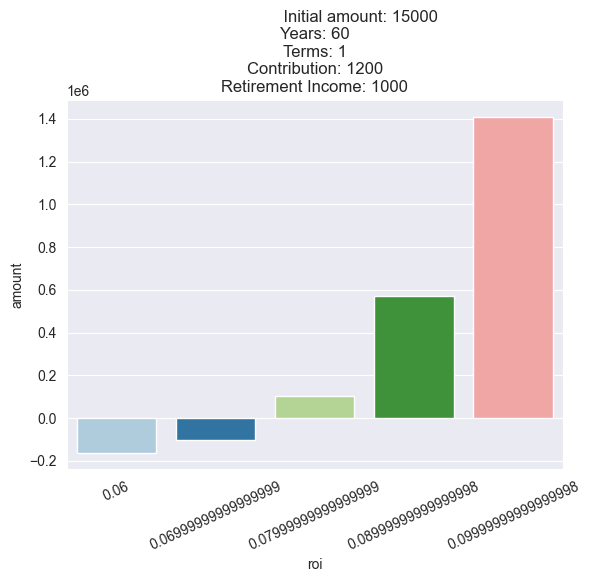

In [52]:
stage_ini_amount = 15_000
stage_years = 60
stage_terms = 1
stage_contrib = 1200
retir_income = 1000
inflation = 0.02
stage_rois = df[(df["initial_amount"] == stage_ini_amount) & \
                (df["year"] == stage_years) & \
                (df["term"] == stage_terms) & \
                (df["contrib"] == stage_contrib) & \
                (df["retir_income"] == retir_income) & \
                (df["inflation"] == inflation) 
                ][["roi", "amount"]]
print(stage_rois.shape)
sns.barplot(data=stage_rois,
            x="roi",
            y="amount",
            )
plt.xticks(rotation=25)
title = f"Initial amount: {stage_ini_amount}\nYears: {stage_years}\nTerms: {stage_terms}\nContribution: {stage_contrib}\nRetirement Income: {retir_income}"
plt.title(20*" " + title)